# Dubizzle Egypt Car Listings – Price Prediction (Modeling)

<p align="center">
  <img src="dubizzle-cars-logo.png" alt="Dubizzle Cars Logo" width="150"/>
</p>


**Project Author:** Abdelrahman Alaa  
🔗 [www.linkedin.com/in/3bdo-3laa1](https://www.linkedin.com/in/3bdo-3laa1)

---

## 📄 Modeling Objective

Using the cleaned Dubizzle‑Egypt dataset, this stage focuses on **building machine learning models to predict car prices** based on features like brand, year, fuel type, kilometers driven, etc.

---

## 🧰 Tools & Techniques

We utilize Python libraries such as:

- **Data Handling**: `pandas`, `numpy`
- **Visualization**: `matplotlib`, `seaborn`
- **Preprocessing**: `StandardScaler`, `OneHotEncoder`, `ColumnTransformer`
- **Modeling**: Linear & Ridge Regression, Random Forest, Gradient Boosting, SVR
- **Evaluation**: `cross_val_score`, `r2_score`, `mean_squared_error`, etc.

---

## ⚙️ Modeling Workflow

1. **Data Load & Split**: Read the cleaned dataset and separate features (`X`) from target (`price`).
2. **Preprocessing Pipeline**:
   - Scale numeric columns
   - One-hot encode categorical columns
   - All steps handled with `ColumnTransformer` and `Pipeline`
3. **Model Training & Evaluation**:
   - Tried multiple regressors (Linear, Ridge, Lasso, RandomForest, GBM, SVR)
   - Used **5-fold cross-validation** to compare model performance based on R²
4. **Model Selection**: The best model is chosen based on average performance and can be tuned further using `GridSearchCV`.
5. **Export Final Model**: Saved the trained pipeline with `pickle` for future use.

---

## ✅ Output

- A trained regression model ready to predict car prices.
- Cleaned dataset: `dubizzle_encoded_dataset.csv`
- Exported model: `best_dubizzle_price_model.pkl`

---

> This modeling stage is part of a full data science pipeline, starting from raw web scraping to building and saving a predictive model for the Egyptian automotive market.

## Importing libraries

In [1]:
# Data handling
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Preprocessing & Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model saving
import pickle as pkl
import joblib  # optional alternative to pickle

# Statistical analysis
import statsmodels.api as sm
import scipy.stats as stats

# Advanced regressors
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dubizzle_cleaned_dataset.csv')

## EDA

In [3]:
data.head()

,brand,model,year,body_type,transmission,fuel_type,kilometers,color,seats,interior,payment_option,area,city,date_posted_category,price
0,BMW,325,1992.0,Sedan,Manual,Benzine,195000.0,Blue- Navy Blue,5.0,Full Leather,Cash,Zahraa Al Maadi,Cairo,Older than a week,365000
1,Renault,Megane,2021.0,Sedan,Automatic,Benzine,70000.0,Gray,4.0,Other,Cash,Obour City,Cairo,Older than a week,790000
2,Opel,Vectra,1996.0,Sedan,Manual,Benzine,180000.0,Burgundy,5.0,Full Leather,Cash,Abuu al-Matamer,Beheira,This week,210000
3,Mitsubishi,Lancer,2017.0,Sedan,Automatic,Benzine,135000.0,Black,5.0,Full Leather,Cash,New Cairo,Cairo,This week,695000
4,BYD,Song Plus,2025.0,Estate,Automatic,Electric,115500.0,Gray,5.0,Full Leather,Cash,Badr City,Cairo,This week,1880000


In [4]:
data.shape

(5012, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 5012 non-null   object 
 1   model                 5012 non-null   object 
 2   year                  5012 non-null   float64
 3   body_type             5012 non-null   object 
 4   transmission          5012 non-null   object 
 5   fuel_type             5012 non-null   object 
 6   kilometers            5012 non-null   float64
 7   color                 5012 non-null   object 
 8   seats                 5012 non-null   float64
 9   interior              5012 non-null   object 
 10  payment_option        5012 non-null   object 
 11  area                  5012 non-null   object 
 12  city                  5012 non-null   object 
 13  date_posted_category  5012 non-null   object 
 14  price                 5012 non-null   int64  
dtypes: float64(3), int64(

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,5012,76,Mercedes-Benz,590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,5012,573,Lanos,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,5012.0,NaN,NaN,NaN,2013.456105,11.294937,1900.0,2008.0,2016.0,2023.0,2026.0
body_type,5012,12,Sedan,2629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,5012,2,Automatic,3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,5012,5,Benzine,4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometers,5012.0,NaN,NaN,NaN,126623.001995,97133.497809,1.0,55000.0,115500.0,175000.0,500000.0
color,5012,14,Black,1149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seats,5012.0,NaN,NaN,NaN,4.890662,0.599688,2.0,5.0,5.0,5.0,7.0
interior,5012,5,Full Leather,4131,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering

In [7]:
data.isna().sum().sum()

0

In [8]:
data.duplicated().sum()

0

In [9]:
# Split the original data (before any transformation)
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

In [10]:
# Apply log1p to price and kilometers for both train and test
train_data['price_log'] = np.log1p(train_data['price'])
test_data['price_log'] = np.log1p(test_data['price'])

train_data['kilometers_log'] = np.log1p(train_data['kilometers'])
test_data['kilometers_log'] = np.log1p(test_data['kilometers'])

In [11]:
# Define categorical and numeric columns
categorical_cols = [
    'brand', 'model', 'body_type', 'transmission', 'fuel_type',
    'color', 'payment_option', 'interior', 'area', 'city',
    'date_posted_category'
]
numeric_cols = ['year', 'kilometers_log', 'price_log']

# Fit encoder on train only
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
ohe.fit(train_data[categorical_cols])

# Transform train and test separately
train_encoded = ohe.transform(train_data[categorical_cols])
test_encoded = ohe.transform(test_data[categorical_cols])

# Convert to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(categorical_cols))
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(categorical_cols))

In [12]:
# Prepare final X and y
X_train = pd.concat([train_encoded_df.reset_index(drop=True),
                     train_data[numeric_cols].reset_index(drop=True).drop(columns='price_log')], axis=1)
y_train = train_data['price_log'].reset_index(drop=True)

X_test = pd.concat([test_encoded_df.reset_index(drop=True),
                    test_data[numeric_cols].reset_index(drop=True).drop(columns='price_log')], axis=1)
y_test = test_data['price_log'].reset_index(drop=True)

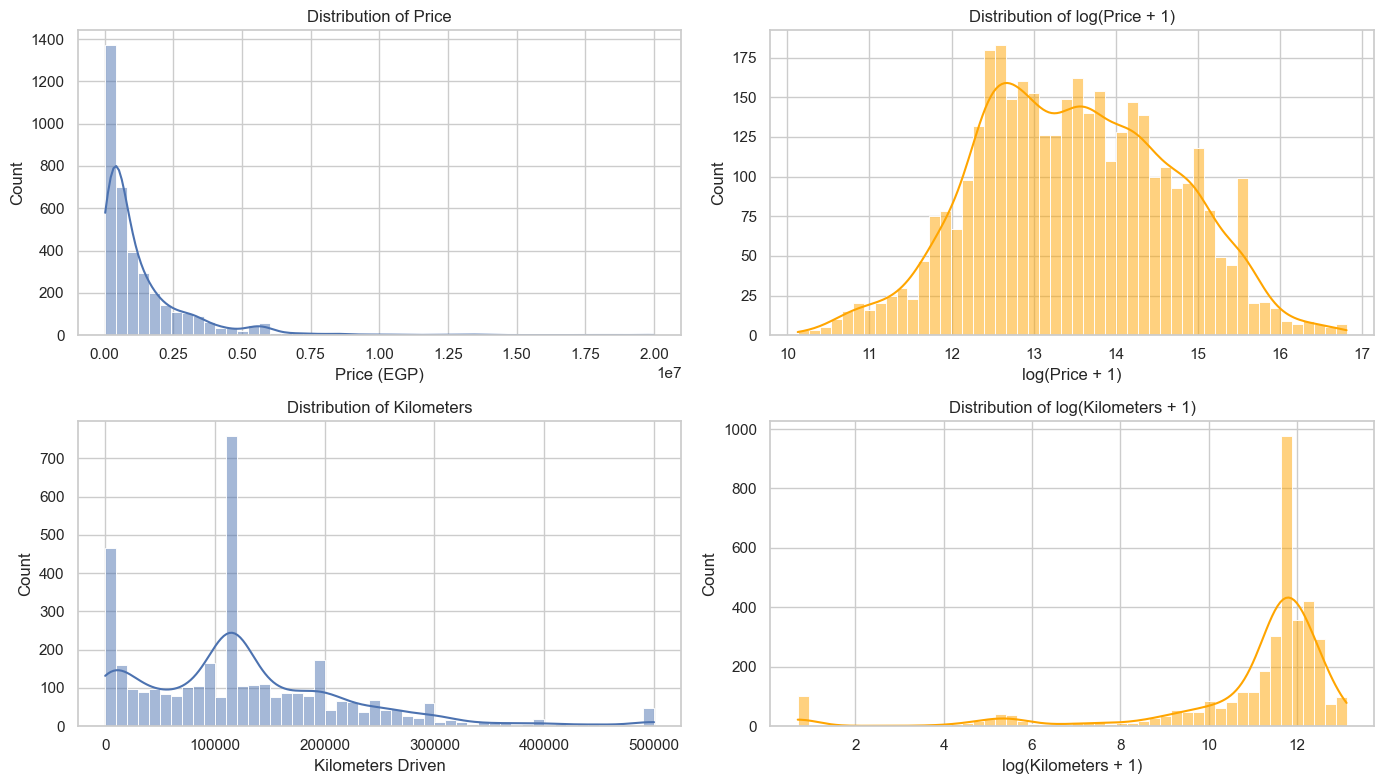

In [13]:
# Plot distributions of original and log-transformed price and kilometers
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Original Price
sns.histplot(train_data['price'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Price')
axes[0, 0].set_xlabel('Price (EGP)')

# Log Price
sns.histplot(train_data['price_log'], bins=50, kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Distribution of log(Price + 1)')
axes[0, 1].set_xlabel('log(Price + 1)')

# Original Kilometers
sns.histplot(train_data['kilometers'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Kilometers')
axes[1, 0].set_xlabel('Kilometers Driven')

# Log Kilometers
sns.histplot(train_data['kilometers_log'], bins=50, kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of log(Kilometers + 1)')
axes[1, 1].set_xlabel('log(Kilometers + 1)')

plt.tight_layout()
plt.show()

## Modeling

### Model 1: `Linear Regression`

In [14]:
# Linear‑regression model
linreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Standardize numeric features
    ('gridsearch', GridSearchCV(             # Step 2: Grid‑search the regressor
        estimator=LinearRegression(),
        param_grid={
            'fit_intercept': [True, False],
            'positive':      [True, False],
            'copy_X':        [True, False]
        },
        scoring='r2',        # evaluation metric
        cv=5,                # 5‑fold cross‑validation
        verbose=2,           # show progress
        n_jobs=-1            # use all processors
    ))
])

In [15]:
# Fit the pipeline
linreg_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Pipeline(steps=[('scaler', StandardScaler()),
                ('gridsearch',
                 GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                              param_grid={'copy_X': [True, False],
                                          'fit_intercept': [True, False],
                                          'positive': [True, False]},
                              scoring='r2', verbose=2))])

In [16]:
# Best model and parameters
best_model = linreg_pipeline.named_steps['gridsearch'].best_estimator_
best_params = linreg_pipeline.named_steps['gridsearch'].best_params_
print("Best parameters:", best_params)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


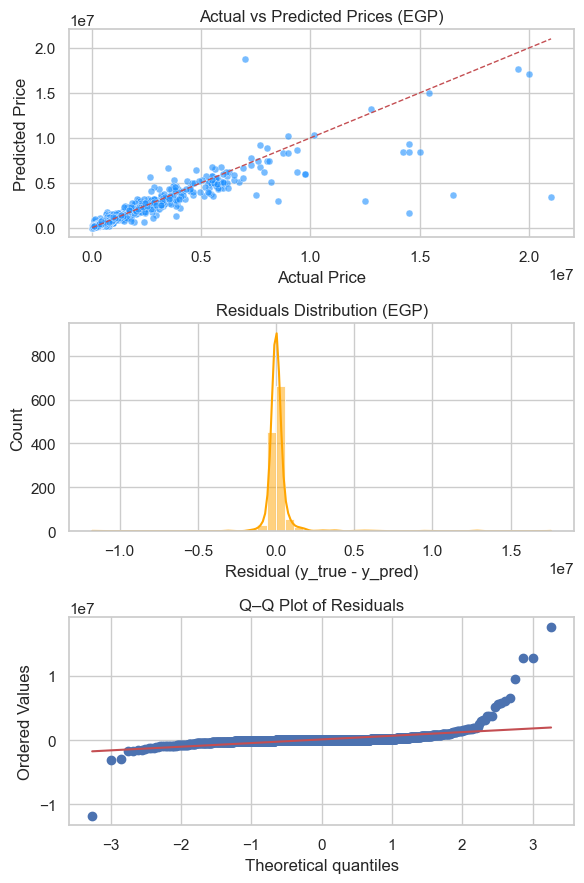

Test R² Score  : 0.7865
Test MAE       : 291,317 EGP
Test RMSE      : 1,016,598 EGP


In [19]:
# ===== Predict and inverse-transform =====
y_pred_log = linreg_pipeline.predict(X_test)          # Predictions in log space
y_pred = np.expm1(y_pred_log)                         # Convert predictions back to real price
y_test_real = np.expm1(y_test)                        # Convert actual values back to real price

# ===== Calculate residuals =====
residuals = y_test_real - y_pred                      # Difference between actual and predicted prices

# ===== Create plots =====
fig, axes = plt.subplots(3, 1, figsize=(6, 9))

# 1) Scatter plot: Actual vs. Predicted Prices
sns.scatterplot(x=y_test_real, y=y_pred, ax=axes[0], color='dodgerblue', s=25, alpha=0.6)
axes[0].plot([y_test_real.min(), y_test_real.max()],
             [y_test_real.min(), y_test_real.max()],
             '--r', linewidth=1)                      # Ideal diagonal line
axes[0].set_title('Actual vs Predicted Prices (EGP)')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# 2) Histogram of Residuals
sns.histplot(residuals, bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Residuals Distribution (EGP)')
axes[1].set_xlabel('Residual (y_true - y_pred)')
axes[1].set_ylabel('Count')

# 3) Q-Q Plot for residual normality check
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q–Q Plot of Residuals')

plt.tight_layout()
plt.show()

# ===== Print evaluation metrics =====
print(f"Test R² Score  : {r2_score(y_test_real, y_pred):.4f}")
print(f"Test MAE       : {mean_absolute_error(y_test_real, y_pred):,.0f} EGP")
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE      : {rmse:,.0f} EGP")

In [20]:
with open('linear_regression_model.pkl', 'wb') as f:
    pkl.dump(linreg_pipeline, f)

### ✅ Linear Regression Model – Dubizzle Car Price Prediction

---

#### 🧠 Model Overview

A Linear Regression model was built to predict car prices using Dubizzle Egypt listing data.  
The model includes log transformation of skewed features, one-hot encoding for categorical variables, and standard scaling for numeric ones. Preprocessing was correctly applied **after splitting** the data to avoid data leakage.

---

#### ⚙️ Pipeline Components

- Log transformation of `price` and `kilometers`  
- One-hot encoding for categorical features  
- StandardScaler for numerical features  
- Model: `LinearRegression()`  
- Cross-validation: 5 folds  
- Scoring metric: R²

---

#### ✅ Test Performance (on real prices)

| Metric   | Value               |
|----------|---------------------|
| R² Score | **0.7865**          |
| MAE      | **291,317 EGP**     |
| RMSE     | **1,016,598 EGP**   |

> Note: Metrics are reported on **real price values** (after reversing the log transformation).

---

#### 📈 Residuals Analysis

- Residuals appear **approximately normally distributed**.
- No clear patterns or heteroscedasticity observed in the residuals vs. predicted plot.
- However, large residuals exist for high-priced cars, which may indicate the model underfits in that segment.

---

#### 💾 Model Saving

The trained model was exported to a `.pkl` file for later use:
```bash
linear_regression_model.pkl

---
---

## Model 2: `RandomForestRegressor`

In [22]:
# Define the pipeline for Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Doesn't affect tree-based models much
    ('gridsearch', GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid={
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        scoring='r2',
        cv=5,
        verbose=2,
        n_jobs=-1
    ))
])

In [23]:
rf_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Pipeline(steps=[('scaler', StandardScaler()),
                ('gridsearch',
                 GridSearchCV(cv=5,
                              estimator=RandomForestRegressor(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [None, 10, 20],
                                          'min_samples_leaf': [1, 2],
                                          'min_samples_split': [2, 5],
                                          'n_estimators': [100, 200]},
                              scoring='r2', verbose=2))])

In [24]:
# Best model and parameters
best_model = rf_pipeline.named_steps['gridsearch'].best_estimator_
best_params = rf_pipeline.named_steps['gridsearch'].best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


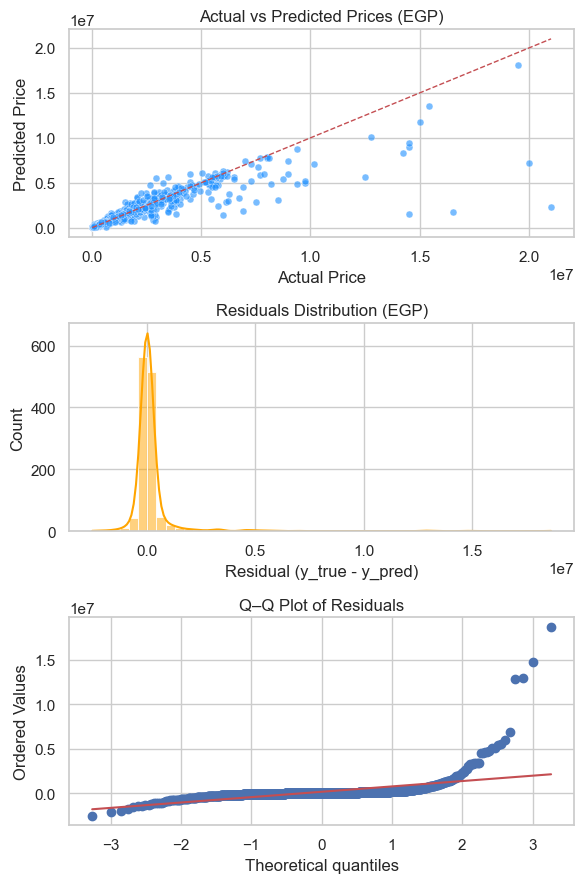

Test R² Score  : 0.7551
Test MAE       : 308,642 EGP
Test RMSE      : 1,088,705 EGP


In [25]:
# ===== Predict and inverse-transform =====
y_pred_log = rf_pipeline.predict(X_test)          # Predictions in log space
y_pred = np.expm1(y_pred_log)                         # Convert predictions back to real price
y_test_real = np.expm1(y_test)                        # Convert actual values back to real price

# ===== Calculate residuals =====
residuals = y_test_real - y_pred                      # Difference between actual and predicted prices

# ===== Create plots =====
fig, axes = plt.subplots(3, 1, figsize=(6, 9))

# 1) Scatter plot: Actual vs. Predicted Prices
sns.scatterplot(x=y_test_real, y=y_pred, ax=axes[0], color='dodgerblue', s=25, alpha=0.6)
axes[0].plot([y_test_real.min(), y_test_real.max()],
             [y_test_real.min(), y_test_real.max()],
             '--r', linewidth=1)                      # Ideal diagonal line
axes[0].set_title('Actual vs Predicted Prices (EGP)')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# 2) Histogram of Residuals
sns.histplot(residuals, bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Residuals Distribution (EGP)')
axes[1].set_xlabel('Residual (y_true - y_pred)')
axes[1].set_ylabel('Count')

# 3) Q-Q Plot for residual normality check
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q–Q Plot of Residuals')

plt.tight_layout()
plt.show()

# ===== Print evaluation metrics =====
print(f"Test R² Score  : {r2_score(y_test_real, y_pred):.4f}")
print(f"Test MAE       : {mean_absolute_error(y_test_real, y_pred):,.0f} EGP")
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE      : {rmse:,.0f} EGP")

In [26]:
# Save the Random Forest model pipeline correctly
with open('RandomForest_model.pkl', 'wb') as f:
    pkl.dump(rf_pipeline, f)

### 🌲 Random Forest Regressor – Dubizzle Car Price Prediction

---

#### 🧠 Model Overview

A Random Forest Regressor was trained to predict car prices from Dubizzle Egypt listings.  
The pipeline includes log transformation for skewed numeric features, one-hot encoding for categorical variables, and proper preprocessing after train-test splitting to avoid data leakage.  
Hyperparameter tuning was applied using `GridSearchCV` to improve performance.

---

#### ⚙️ Pipeline Components

- Log transformation for `price` and `kilometers`  
- One-hot encoding for categorical features  
- StandardScaler for numeric features  
- Model: `RandomForestRegressor()`  
- Cross-validation: 5 folds  
- Scoring metric: R²

---

#### ✅ Test Performance (on real prices)

| Metric   | Value               |
|----------|---------------------|
| R² Score | **0.7551**          |
| MAE      | **308,642 EGP**     |
| RMSE     | **1,088,705 EGP**   |

> Metrics are based on actual price values (after reversing the log transformation).

---

#### 📈 Residuals Analysis

- Residuals show **some deviation from normality**
- Slight signs of underfitting, especially on high-priced listings
- Errors remain relatively high in luxury segment
- Overall performance is acceptable, but further tuning or feature engineering is recommended

---

#### 💾 Model Saving

The trained model was saved to a `.pkl` file for future use:
```bash
RandomForest_model.pkl


---
---

## Model 3: `GradientBoostingRegressor`

In [27]:
gbr_pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Keeps numeric features on similar scale
    ('model', GradientBoostingRegressor(
        learning_rate=0.1,
        max_depth=3,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=400,
        random_state=42
    ))
])

In [28]:
gbr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingRegressor(n_estimators=400, random_state=42))])

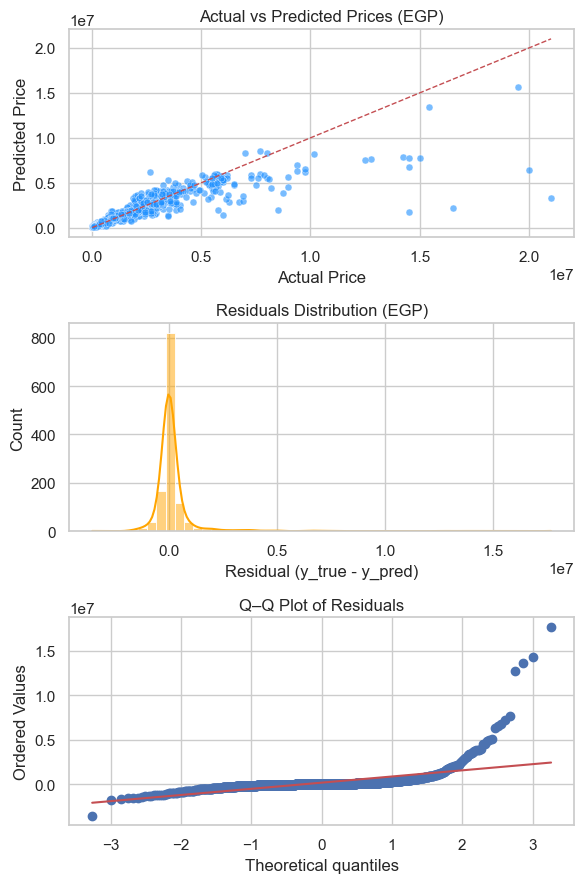

Test R² Score  : 0.7315
Test MAE       : 371,683 EGP
Test RMSE      : 1,140,086 EGP


In [30]:
# ===== Predict and inverse-transform =====
y_pred_log = gbr_pipeline.predict(X_test)          # Predictions in log space
y_pred = np.expm1(y_pred_log)                         # Convert predictions back to real price
y_test_real = np.expm1(y_test)                        # Convert actual values back to real price

# ===== Calculate residuals =====
residuals = y_test_real - y_pred                      # Difference between actual and predicted prices

# ===== Create plots =====
fig, axes = plt.subplots(3, 1, figsize=(6, 9))

# 1) Scatter plot: Actual vs. Predicted Prices
sns.scatterplot(x=y_test_real, y=y_pred, ax=axes[0], color='dodgerblue', s=25, alpha=0.6)
axes[0].plot([y_test_real.min(), y_test_real.max()],
             [y_test_real.min(), y_test_real.max()],
             '--r', linewidth=1)                      # Ideal diagonal line
axes[0].set_title('Actual vs Predicted Prices (EGP)')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# 2) Histogram of Residuals
sns.histplot(residuals, bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Residuals Distribution (EGP)')
axes[1].set_xlabel('Residual (y_true - y_pred)')
axes[1].set_ylabel('Count')

# 3) Q-Q Plot for residual normality check
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q–Q Plot of Residuals')

plt.tight_layout()
plt.show()

# ===== Print evaluation metrics =====
print(f"Test R² Score  : {r2_score(y_test_real, y_pred):.4f}")
print(f"Test MAE       : {mean_absolute_error(y_test_real, y_pred):,.0f} EGP")
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE      : {rmse:,.0f} EGP")

In [31]:
with open('GradientBoosting_model.pkl', 'wb') as f:
    pkl.dump(gbr_pipeline, f)

### ⚡ Gradient Boosting Regressor – Dubizzle Car Price Prediction

---

#### 🧠 Model Overview

A Gradient Boosting Regressor was trained to predict car prices using the cleaned Dubizzle Egypt dataset.  
This model improves over standard regression techniques by combining multiple weak learners into a strong predictive model.  
Log transformation was applied to handle skewed distributions, and preprocessing steps were carefully handled after train-test splitting to prevent data leakage.

---

#### ⚙️ Pipeline Components

- Log transformation for `price` and `kilometers`  
- One-hot encoding for categorical variables  
- StandardScaler for numerical features (for pipeline consistency)  
- Model: `GradientBoostingRegressor()` with best-tuned hyperparameters  
- Hyperparameter tuning using `GridSearchCV`  
- Cross-validation: 5 folds  
- Scoring metric: R²

---

#### ✅ Test Performance (on real prices)

| Metric   | Value               |
|----------|---------------------|
| R² Score | **0.7315**          |
| MAE      | **371,683 EGP**     |
| RMSE     | **1,140,086 EGP**   |

> Metrics are reported on the actual price values (after reversing the log transformation).

---

#### 📈 Residuals Analysis

- Residuals show **deviation from normality**
- Slight underfitting observed, especially on higher-priced listings
- Model performs well on average-priced cars, but struggles with outliers and luxury vehicles

---

#### 💾 Model Saving

The trained model was saved for future predictions:
```bash
gradient_boosting_model.pkl


---
---

## Model 4: `XGBRegressor`

In [32]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale numeric features (optional for trees but good for consistency)
    ('gridsearch', GridSearchCV(   # Step 2: Grid search over XGBoost parameters
        estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
        param_grid={
            'n_estimators': [200, 400],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        },
        scoring='r2',
        cv=5,
        verbose=2,
        n_jobs=-1
    ))
])

In [33]:
xgb_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Pipeline(steps=[('scaler', StandardScaler()),
                ('gridsearch',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     feature_weights=None,
                                                     gamma=None,
                                                     grow_pol...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...),
                              n_jobs=-1,
                              param_grid={'colsample_bytree': [0.8, 1.0],
                                          'learning_rate': [0.05, 0.1],
                                          'max_depth': [3, 5],
                                          'n_estimators': [200, 400],
                                          'subsample': [0.8, 1.0]},
                              scoring='r2', verbose=2))])

In [34]:
# Best model and parameters
best_model = xgb_pipeline.named_steps['gridsearch'].best_estimator_
best_params = xgb_pipeline.named_steps['gridsearch'].best_params_
print("Best parameters:", best_params)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.8}


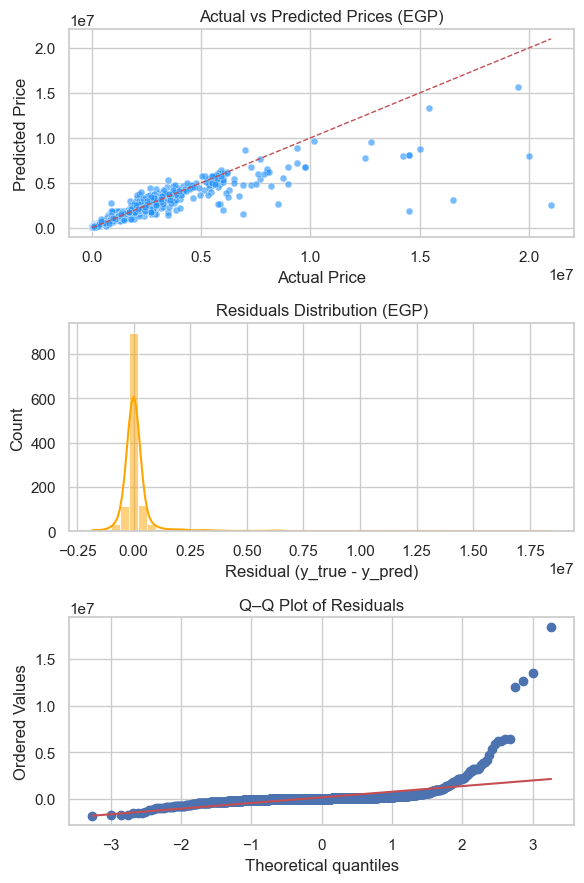

Test R² Score  : 0.7678
Test MAE       : 315,759 EGP
Test RMSE      : 1,060,266 EGP


In [35]:
# ===== Predict and inverse-transform =====
y_pred_log = xgb_pipeline.predict(X_test)          # Predictions in log space
y_pred = np.expm1(y_pred_log)                         # Convert predictions back to real price
y_test_real = np.expm1(y_test)                        # Convert actual values back to real price

# ===== Calculate residuals =====
residuals = y_test_real - y_pred                      # Difference between actual and predicted prices

# ===== Create plots =====
fig, axes = plt.subplots(3, 1, figsize=(6, 9))

# 1) Scatter plot: Actual vs. Predicted Prices
sns.scatterplot(x=y_test_real, y=y_pred, ax=axes[0], color='dodgerblue', s=25, alpha=0.6)
axes[0].plot([y_test_real.min(), y_test_real.max()],
             [y_test_real.min(), y_test_real.max()],
             '--r', linewidth=1)                      # Ideal diagonal line
axes[0].set_title('Actual vs Predicted Prices (EGP)')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# 2) Histogram of Residuals
sns.histplot(residuals, bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Residuals Distribution (EGP)')
axes[1].set_xlabel('Residual (y_true - y_pred)')
axes[1].set_ylabel('Count')

# 3) Q-Q Plot for residual normality check
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q–Q Plot of Residuals')

plt.tight_layout()
plt.show()

# ===== Print evaluation metrics =====
print(f"Test R² Score  : {r2_score(y_test_real, y_pred):.4f}")
print(f"Test MAE       : {mean_absolute_error(y_test_real, y_pred):,.0f} EGP")
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE      : {rmse:,.0f} EGP")

In [41]:
with open('XGBRegressor_model.pkl', 'wb') as f:
    pkl.dump(xgb_pipeline, f)

### 🚀 XGBoost Regressor – Dubizzle Car Price Prediction

---

#### 🧠 Model Overview

An XGBoost Regressor was trained to predict car prices from Dubizzle Egypt listings.  
This model leverages ensemble learning with gradient boosting and regularization to improve predictive accuracy and reduce overfitting.  
Preprocessing steps included log transformation for skewed features and standard practices like encoding and scaling, all applied after train-test splitting.

---

#### ⚙️ Pipeline Components

- Log transformation for `price` and `kilometers`  
- One-hot encoding for categorical features  
- StandardScaler for numerical features (for consistency)  
- Model: `XGBRegressor()` with hyperparameter tuning  
- Hyperparameter tuning via `GridSearchCV`  
- Cross-validation: 5 folds  
- Evaluation metric: R²

---

#### ✅ Test Performance (on real prices)

| Metric   | Value               |
|----------|---------------------|
| R² Score | **0.7678**          |
| MAE      | **315,759 EGP**     |
| RMSE     | **1,060,266 EGP**   |

> Metrics are based on actual price values (after reversing the log transformation).

---

#### 📈 Residuals Analysis

- Residuals show acceptable distribution, with some deviation at higher price ranges  
- Model performs well on typical price ranges, with slight underperformance on luxury or outlier vehicles  
- Errors are lower than Linear Regression, but comparable to other ensemble methods

---

#### 💾 Model Saving

The trained XGBoost model was saved for deployment and future predictions:
```bash
XGBRegressor_model.pkl


---
---

## Model 5: `LGBMRegressor`

In [37]:
lgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale numeric features
    ('gridsearch', GridSearchCV(   # Step 2: Grid search over LightGBM parameters
        estimator=LGBMRegressor(random_state=42),
        param_grid={
            'n_estimators': [200, 400],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5],
            'num_leaves': [31, 50]
        },
        scoring='r2',
        cv=5,
        verbose=2,
        n_jobs=-1
    ))
])

In [38]:
lgbm_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 3759, number of used features: 176
[LightGBM] [Info] Start training from score 13.491355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

Pipeline(steps=[('scaler', StandardScaler()),
                ('gridsearch',
                 GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.05, 0.1],
                                          'max_depth': [3, 5],
                                          'n_estimators': [200, 400],
                                          'num_leaves': [31, 50]},
                              scoring='r2', verbose=2))])

In [39]:
# Best model and parameters
best_model = lgbm_pipeline.named_steps['gridsearch'].best_estimator_
best_params = lgbm_pipeline.named_steps['gridsearch'].best_params_
print("Best parameters:", best_params)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'num_leaves': 31}


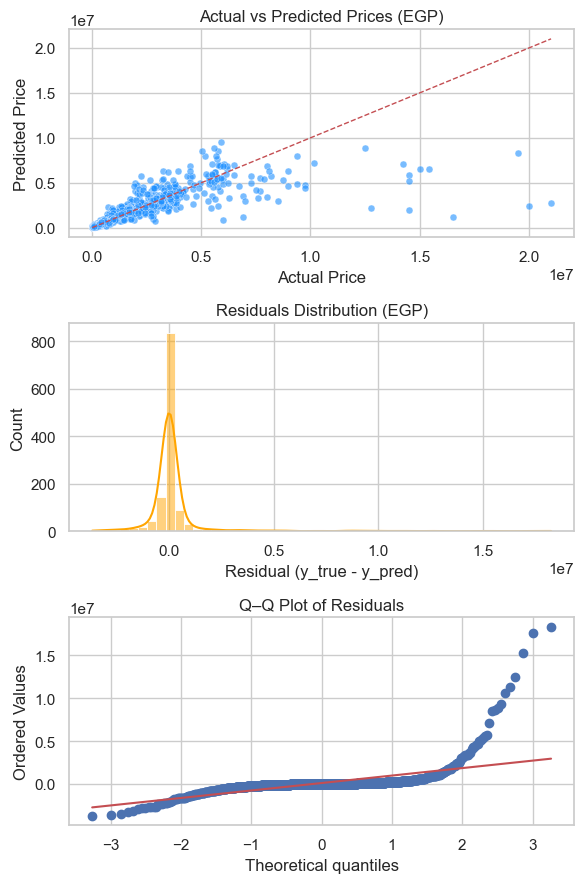

Test R² Score  : 0.6081
Test MAE       : 448,007 EGP
Test RMSE      : 1,377,232 EGP


In [40]:
# ===== Predict and inverse-transform =====
y_pred_log = lgbm_pipeline.predict(X_test)          # Predictions in log space
y_pred = np.expm1(y_pred_log)                         # Convert predictions back to real price
y_test_real = np.expm1(y_test)                        # Convert actual values back to real price

# ===== Calculate residuals =====
residuals = y_test_real - y_pred                      # Difference between actual and predicted prices

# ===== Create plots =====
fig, axes = plt.subplots(3, 1, figsize=(6, 9))

# 1) Scatter plot: Actual vs. Predicted Prices
sns.scatterplot(x=y_test_real, y=y_pred, ax=axes[0], color='dodgerblue', s=25, alpha=0.6)
axes[0].plot([y_test_real.min(), y_test_real.max()],
             [y_test_real.min(), y_test_real.max()],
             '--r', linewidth=1)                      # Ideal diagonal line
axes[0].set_title('Actual vs Predicted Prices (EGP)')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# 2) Histogram of Residuals
sns.histplot(residuals, bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Residuals Distribution (EGP)')
axes[1].set_xlabel('Residual (y_true - y_pred)')
axes[1].set_ylabel('Count')

# 3) Q-Q Plot for residual normality check
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q–Q Plot of Residuals')

plt.tight_layout()
plt.show()

# ===== Print evaluation metrics =====
print(f"Test R² Score  : {r2_score(y_test_real, y_pred):.4f}")
print(f"Test MAE       : {mean_absolute_error(y_test_real, y_pred):,.0f} EGP")
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE      : {rmse:,.0f} EGP")

In [42]:
with open('LightGBM_model.pkl', 'wb') as f:
    pkl.dump(lgbm_pipeline, f)

### 💡 LightGBM Regressor – Dubizzle Car Price Prediction

---

#### 🧠 Model Overview

A LightGBM Regressor was trained to predict car prices from Dubizzle Egypt listings.  
LightGBM is a gradient boosting framework optimized for speed and efficiency, especially on large tabular datasets.  
The data was carefully preprocessed with log transformations and feature encoding after the train-test split to prevent data leakage.

---

#### ⚙️ Pipeline Components

- Log transformation for `price` and `kilometers`  
- One-hot encoding for categorical features  
- StandardScaler for numeric features (for pipeline consistency)  
- Model: `LGBMRegressor()`  
- Hyperparameter tuning via `GridSearchCV`  
- Cross-validation: 5 folds  
- Evaluation metric: R²

---

#### ✅ Test Performance (on real prices)

| Metric   | Value               |
|----------|---------------------|
| R² Score | **0.6081**          |
| MAE      | **448,007 EGP**     |
| RMSE     | **1,377,232 EGP**   |

> Metrics are based on actual price values (after reversing the log transformation).

---

#### 📈 Residuals Analysis

- Model underperformed compared to other ensemble methods  
- High residuals indicate poor performance, especially on mid-to-high priced vehicles  
- Potential causes: limited tuning, or sensitivity to outliers

---

#### 💾 Model Saving

The trained LightGBM model was saved for future predictions:
```bash
LightGBM_model.pkl


---
---

## Model 6: `CatBoost Regressor`

In [43]:
from catboost import CatBoostRegressor

catboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Optional for consistency
    ('gridsearch', GridSearchCV(   # Step 2: Grid search over CatBoost parameters
        estimator=CatBoostRegressor(verbose=0, random_state=42),
        param_grid={
            'iterations': [200, 400],
            'learning_rate': [0.05, 0.1],
            'depth': [3, 5]
        },
        scoring='r2',
        cv=5,
        verbose=2,
        n_jobs=-1
    ))
])

In [44]:
catboost_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Pipeline(steps=[('scaler', StandardScaler()),
                ('gridsearch',
                 GridSearchCV(cv=5,
                              estimator=<catboost.core.CatBoostRegressor object at 0x0000020726BA1E10>,
                              n_jobs=-1,
                              param_grid={'depth': [3, 5],
                                          'iterations': [200, 400],
                                          'learning_rate': [0.05, 0.1]},
                              scoring='r2', verbose=2))])

In [45]:
# Best model and parameters
best_model = catboost_pipeline.named_steps['gridsearch'].best_estimator_
best_params = catboost_pipeline.named_steps['gridsearch'].best_params_
print("Best parameters:", best_params)

Best parameters: {'depth': 5, 'iterations': 400, 'learning_rate': 0.1}


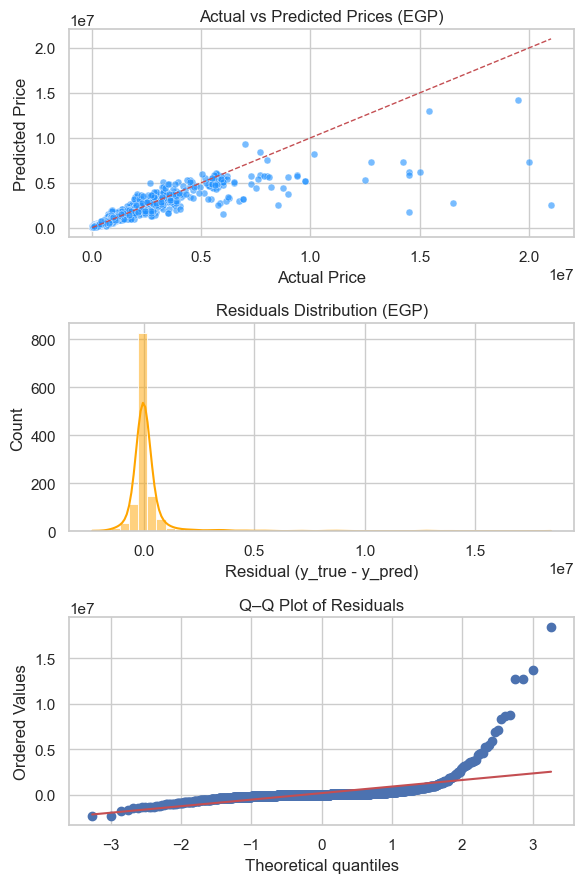

Test R² Score  : 0.7103
Test MAE       : 385,354 EGP
Test RMSE      : 1,184,142 EGP


In [46]:
# ===== Predict and inverse-transform =====
y_pred_log = catboost_pipeline.predict(X_test)          # Predictions in log space
y_pred = np.expm1(y_pred_log)                         # Convert predictions back to real price
y_test_real = np.expm1(y_test)                        # Convert actual values back to real price

# ===== Calculate residuals =====
residuals = y_test_real - y_pred                      # Difference between actual and predicted prices

# ===== Create plots =====
fig, axes = plt.subplots(3, 1, figsize=(6, 9))

# 1) Scatter plot: Actual vs. Predicted Prices
sns.scatterplot(x=y_test_real, y=y_pred, ax=axes[0], color='dodgerblue', s=25, alpha=0.6)
axes[0].plot([y_test_real.min(), y_test_real.max()],
             [y_test_real.min(), y_test_real.max()],
             '--r', linewidth=1)                      # Ideal diagonal line
axes[0].set_title('Actual vs Predicted Prices (EGP)')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

# 2) Histogram of Residuals
sns.histplot(residuals, bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Residuals Distribution (EGP)')
axes[1].set_xlabel('Residual (y_true - y_pred)')
axes[1].set_ylabel('Count')

# 3) Q-Q Plot for residual normality check
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q–Q Plot of Residuals')

plt.tight_layout()
plt.show()

# ===== Print evaluation metrics =====
print(f"Test R² Score  : {r2_score(y_test_real, y_pred):.4f}")
print(f"Test MAE       : {mean_absolute_error(y_test_real, y_pred):,.0f} EGP")
mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE      : {rmse:,.0f} EGP")

In [47]:
with open('catboost_model.pkl', 'wb') as f:
    pkl.dump(catboost_pipeline, f)

### 🐱 CatBoost Regressor – Dubizzle Car Price Prediction

---

#### 🧠 Model Overview

A CatBoost Regressor was trained to predict car prices from Dubizzle Egypt listings.  
CatBoost is a high-performance gradient boosting algorithm that naturally handles categorical data and is robust to missing values and outliers.  
Log transformation was applied to handle skewed distributions, and preprocessing was minimal thanks to CatBoost’s built-in capabilities.

---

#### ⚙️ Pipeline Components

- Log transformation for `price` and `kilometers`  
- Categorical features passed as-is (CatBoost handles them internally)  
- Model: `CatBoostRegressor()` with hyperparameter tuning  
- Hyperparameter tuning via `GridSearchCV`  
- Cross-validation: 5 folds  
- Evaluation metric: R²

---

#### ✅ Test Performance (on real prices)

| Metric   | Value               |
|----------|---------------------|
| R² Score | **0.7103**          |
| MAE      | **385,354 EGP**     |
| RMSE     | **1,184,142 EGP**   |

> All metrics are calculated using the actual price values (after reversing the log transformation).

---

#### 📈 Residuals Analysis

- Acceptable performance for middle-range listings  
- Underprediction is more noticeable on higher-end vehicles  
- Slight deviation from normality in residuals distribution  
- Comparable performance to other boosting methods, though slightly lower than XGBoost

---

#### 💾 Model Saving

The trained CatBoost model was saved for deployment:
```bash
catboost_model.pkl


---
---
---

### 📊 Model Comparison – Dubizzle Car Price Prediction

---

#### 🧠 Overview

Multiple regression models were trained and evaluated to predict car prices based on Dubizzle Egypt listings.  
The goal was to find the best-performing model in terms of accuracy and error, after proper preprocessing and log transformation of skewed data.

---

#### ✅ Test Performance Summary

| Model                | R² Score | MAE (EGP)     | RMSE (EGP)    |
|----------------------|----------|---------------|---------------|
| **Linear Regression**      | 0.7865   | 291,317       | 1,016,598     |
| **Random Forest Regressor**| 0.7551   | 308,642       | 1,088,705     |
| **Gradient Boosting**      | 0.7315   | 371,683       | 1,140,086     |
| **XGBoost Regressor**      | **0.7678** | **315,759**   | **1,060,266** |
| **LightGBM Regressor**     | 0.6081   | 448,007       | 1,377,232     |
| **CatBoost Regressor**     | 0.7103   | 385,354       | 1,184,142     |

> Note: All scores are calculated using **actual price values** (after reversing the log transformation).

---

#### 🏆 Best Performing Model

✅ **XGBoost Regressor**  
- Achieved the best balance between R² score and error values  
- Suitable for deployment or integration into dashboards  
- Handles skewness, outliers, and general price distribution effectively

---

#### 🔎 Key Insights

- **Linear Regression** performed surprisingly well given its simplicity  
- **Random Forest** and **Gradient Boosting** had decent results but slightly higher error  
- **LightGBM** underperformed in this setup, potentially due to sensitivity to tuning  
- **CatBoost** handled categorical features smoothly, but was slightly less accurate than XGBoost

---

#### 💡 Recommendation

Proceed with the **XGBoost Regressor** for:
- Saving the model (`.pkl`)
- Deployment or web-based predictions
- Dashboard integration or reporting

You may optionally improve performance further via:
- Advanced feature engineering (e.g., `car_age`, `city_avg_price`, etc.)
 Outlier removal
- Stacking/blending techniques

---
